**Setup Python 3.8 on Colab Environment.**

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.8
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2
!python --version
!sudo apt-get install python3-pip
!python -m pip install --upgrade pip
!pip install ipykernel

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.8 kB]
Hit:12 http://ppa.launchpad.net/cran/

**Installing OpeNTF**

In [2]:
%rm -R opentf/
!git clone https://github.com/fani-lab/opentf
%cd opentf/
!pip install -r requirements.txt
%cd src/

rm: cannot remove 'opentf/': No such file or directory
Cloning into 'opentf'...
remote: Enumerating objects: 3166, done.
remote: Counting objects: 100% (3166/3166), done.
remote: Compressing objects: 100% (2244/2244), done.
remote: Total 3166 (delta 1385), reused 2481 (delta 879), pack-reused 0
Receiving objects: 100% (3166/3166), 34.66 MiB | 17.18 MiB/s, done.
Resolving deltas: 100% (1385/1385), done.
/content/opentf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 881.9/881.9 MB 147.1 MB/s eta 0:00:01tcmalloc: large alloc 1102422016 bytes == 0x388c2000 @  0x7fc456861615 0x4f69ad 0x5aa051 0x5a9f83 0x5d290c 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x4fa54a 0x556ea9 0x555bc0 0x4fa5dd 0x557802 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 48.5 MB/s eta 0:0

/content/opentf/src


**Default Hyperparameters**

In [3]:
!cat param.py

import random
import torch
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

np.random.seed(0)

settings = {
    'model':{
        'baseline': {
            'random': {
                'b': 4096
            },
            'fnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
            },
            'bnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
                's': 1  # # sample_elbo for bnn
            },
           

**Change Hyperparameters, e.g., Negative Sampling Heuristics and Number of Negative Samples**
```
settings['model']['baseline']['fnn']['ns'] = 'uniform'
settings['model']['baseline']['fnn']['nns'] = 1
settings['model']['baseline']['bnn']['ns'] = 'unigram_b'
settings['model']['baseline']['bnn']['nns'] = 2
```



In [4]:
%%writefile param.py 
import random
import torch
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

np.random.seed(0)

settings = {
    'model':{
        'baseline': {
            'random': {
                'b': 4096
            },
            'fnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': 1,  # number of negative samples
                'ns': 'uniform',  # 'uniform', 'unigram', 'unigram_b'
            },
            'bnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': 2,  # number of negative samples
                'ns': 'unigram_b',  # 'uniform', 'unigram', 'unigram_b'
                's': 1  # # sample_elbo for bnn
            },
            'emb':{
                'd': 100,# embedding dimension
                'e': 100,# epoch
                'dm': 1,# training algorithm. 1: distributed memory (PV-DM), 0: distributed bag of words (PV-DBOW)
                'w': 1 #cooccurrence window
            }
        },
        'cmd': ['train', 'test', 'eval', 'plot'],  # 'train', 'test', 'eval'
        'nfolds': 3,
        'train_test_split': 0.85
    },
    'data':{
        'domain': {
            'dblp':{},
            'uspt':{},
            'imdb':{},
        },
        'filter': {
            'min_nteam': 75,
            'min_team_size': 3,
        },
        'parallel': 1,
        'ncore': 0,# <= 0 for all
        'bucket_size': 500
    },
}

Overwriting param.py


**Clearing Cache Pickles for Teams Sparse Matrix if Exist`(Optional)`**

In [5]:
!rm -R ../data/preprocessed/dblp/toy.dblp.v12.json/

**Benchmark on Toy subsets of DBLP and IMDB for non-Bayesian Feedforward (fnn) and Bayesian (bnn) Models as well as Random Baseline**

In [6]:
!python main.py -data ../data/raw/dblp/toy.dblp.v12.json ../data/raw/imdb/toy.title.basics.tsv -domain dblp imdb -model fnn fnn_emb bnn bnn_emb random

Loading sparse matrices from ./../data/preprocessed/dblp/toy.dblp.v12.json/teamsvecs.pkl ...
File not found! Generating the sparse matrices ...
Loading indexes pickle from ./../data/preprocessed/dblp/toy.dblp.v12.json/indexes.pkl ...
Pickles not found! Reading raw data from ../data/raw/dblp/toy.dblp.v12.json (progress in bytes) ...
  0% 0/46630 [00:00<?, ?it/s]JSONDecodeError: There has been error in loading json line `[
`!
Expecting value: line 2 column 1 (char 2)
JSONDecodeError: There has been error in loading json line `]`!
Expecting value: line 1 column 1 (char 0)
100% 46606/46630 [00:00<00:00, 8782053.65it/s]
It took 0.00823354721069336 seconds to pickle the data into ./../data/preprocessed/dblp/toy.dblp.v12.json
It took 0.07705211639404297 seconds to generate and store the sparse matrices of size (31, 25) at ./../data/preprocessed/dblp/toy.dblp.v12.json/teamsvecs.pkl
Building pytrec_eval input for 5 instances ...
Evaluating {'P_2,5,10', 'recall_2,5,10', 'ndcg_cut_2,5,10', 'map_c

**Benchmark Output Folder on toy.dblp for Baselines**

In [11]:
!ls ../output/toy.dblp.v12.json/

bnn  bnn_emb  fnn  fnn_emb  random


**Let's look at the Bayesian (bnn) Results**

```
#team:31, #skills:11, #members:13
layers:[100], learning rate:0.1, batch size:4096, epoch:20, 
#negative samples:2, negative sampling: unigram_b, elbo samples:1
```

In [12]:
!ls ../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.nns2.nsunigram_b.s1

f0.test.pred		    state_dict_model.f1.e15.pt
f0.test.pred.eval.mean.csv  state_dict_model.f1.e16.pt
f0.test.pred.eval.roc.pkl   state_dict_model.f1.e17.pt
f0.train_valid_loss.png     state_dict_model.f1.e18.pt
f1.test.pred		    state_dict_model.f1.e19.pt
f1.test.pred.eval.mean.csv  state_dict_model.f1.e1.pt
f1.test.pred.eval.roc.pkl   state_dict_model.f1.e2.pt
f1.train_valid_loss.png     state_dict_model.f1.e3.pt
f2.test.pred		    state_dict_model.f1.e4.pt
f2.test.pred.eval.mean.csv  state_dict_model.f1.e5.pt
f2.test.pred.eval.roc.pkl   state_dict_model.f1.e6.pt
f2.train_valid_loss.png     state_dict_model.f1.e7.pt
state_dict_model.f0.e0.pt   state_dict_model.f1.e8.pt
state_dict_model.f0.e10.pt  state_dict_model.f1.e9.pt
state_dict_model.f0.e11.pt  state_dict_model_f1.pt
state_dict_model.f0.e12.pt  state_dict_model.f2.e0.pt
state_dict_model.f0.e13.pt  state_dict_model.f2.e10.pt
state_dict_model.f0.e14.pt  state_dict_model.f2.e11.pt
state_dict_model.f0.e15.pt  state_dict_model.f2.e12.pt

**ROC Plot for 3-Fold Cross-Validated Models on Test Set**

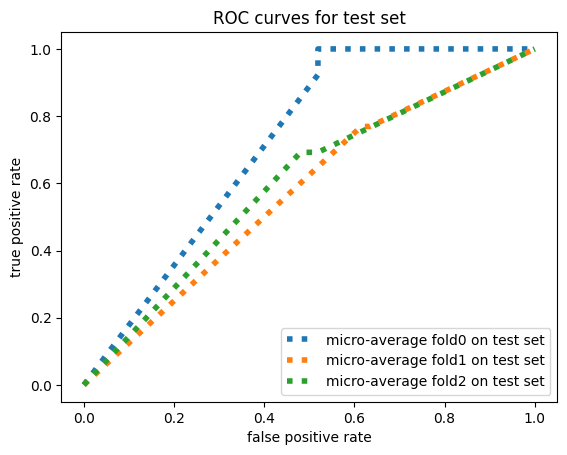

In [13]:
from IPython.display import Image
Image('../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.nns2.nsunigram_b.s1/test.roc.png')

In [14]:
import pandas as pd
pd.read_csv('../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.nns2.nsunigram_b.s1/test.pred.eval.mean.csv', index_col = 0)

mean
P_2          0.100000
P_5          0.200000
P_10         0.233333
recall_2     0.072222
recall_5     0.388889
recall_10    0.877778
ndcg_cut_2   0.077371
ndcg_cut_5   0.253334
ndcg_cut_10  0.464721
map_cut_2    0.036111
map_cut_5    0.143426
map_cut_10   0.279246
aucroc       0.631657